# Sample - effective model

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

lay_Pt_top = nx.Layer(id = "Pt top",
                      material = nx.Material.Template(nx.lib.material.Pt),
                      thickness = 2,
                      roughness = 2.0)

lay_C = nx.Layer(id = "C",
                 material = nx.Material.Template(nx.lib.material.C),
                 thickness = 20,
                 roughness = 2.3)

lay_Pt = nx.Layer(id = "Pt",
                  material = nx.Material.Template(nx.lib.material.Pt),
                  thickness = 15,
                  roughness = 0.2)

lay_substrate = nx.Layer(id = "Si sub",
                         material = nx.Material.Template(nx.lib.material.Si),
                         thickness = nx.inf,
                         roughness = 0.2)

sample = nx.Sample(layers = [lay_Pt_top, lay_C, lay_Pt, lay_substrate],
                   geometry = "r",
                   length = nx.inf,
                   roughness = "a",
                   id = "my sample")


In [2]:
# specify the effective layer thickness and if nulcear scattering matrices should be mixed as well
sample.EffectiveLayerSystem(eff_layer_thickness = 0.3, nuclear = False)

In [3]:
print("extended layers\n")

for lay in sample.extended_layers:
    print(lay)

print("effective layers\n")
for lay in sample.effective_layers:
    print(lay)

extended layers

Effective density model layer:
  .thickness: 10.0
  .roughness: 0.0
  .grazing_scattering_factor: 0j

Effective density model layer:
  .thickness: 2.0
  .roughness: 2.0
  .grazing_scattering_factor: (nan+0j)

Effective density model layer:
  .thickness: 20.0
  .roughness: 2.3
  .grazing_scattering_factor: (nan+0j)

Effective density model layer:
  .thickness: 15.0
  .roughness: 0.2
  .grazing_scattering_factor: (nan+0j)

Effective density model layer:
  .thickness: 1.3
  .roughness: 0.2
  .grazing_scattering_factor: (nan+0j)

Effective density model layer:
  .thickness: inf
  .roughness: 0.0
  .grazing_scattering_factor: (nan+0j)

effective layers

Effective density model layer:
  .thickness: 0.3
  .roughness: 0.0
  .grazing_scattering_factor: (nan+0j)

Effective density model layer:
  .thickness: 0.3
  .roughness: 0.0
  .grazing_scattering_factor: (nan+0j)

Effective density model layer:
  .thickness: 0.3
  .roughness: 0.0
  .grazing_scattering_factor: (nan+0j)

Effec

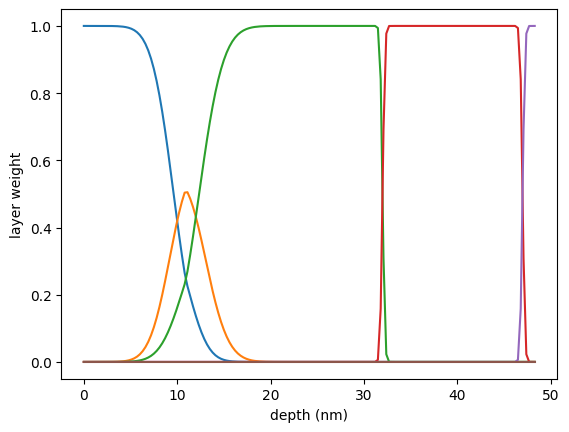

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
for lay in sample.extended_layers:
    plt.plot(sample.effective_coordinates, lay.effective_layer_weight)

plt.xlabel('depth (nm)')
plt.ylabel('layer weight')
plt.show()

# check that the sum is one everywhere
sum = np.zeros(len(sample.extended_layers[0].effective_layer_weight))

for lay in sample.extended_layers:
    sum = np.add(sum, np.array(lay.effective_layer_weight))

print(sum)
#plt.plot(sample.effective_coordinates, sum)
#plt.show()

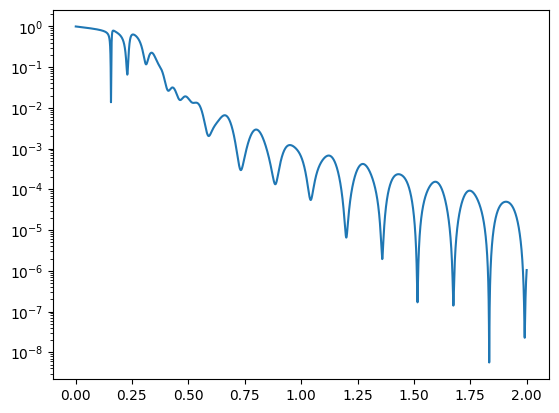

In [5]:
beam  = nx.Beam()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.moessbauer.Fe57,
                    id = "my exp")

sample.roughness = "e"

angles = np.arange(0.001, 2, 0.0001, dtype = np.double)

reflectivity = nx.Reflectivity(experiment = exp,
                               sample = sample,
                               energy = nx.lib.energy.Fe57,
                               angles = angles)

refl_a = reflectivity()

plt.semilogy(angles, refl_a)
plt.show()

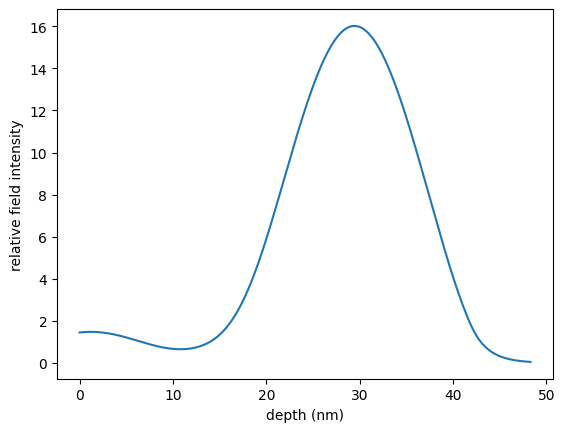

In [6]:
sample.angle = 0.158

sample.roughness = "e"

sample.effective_thickness = 0.3

field_int = nx.FieldIntensity(sample = sample,
                              energy = nx.lib.energy.Fe57,
                              points = 1001)

depth, int = field_int()

plt.plot(depth, int)
plt.xlabel('depth (nm)')
plt.ylabel('relative field intensity')
plt.show()

In [7]:
print("extended layers\n")

for lay in sample.extended_layers:
    print(lay)

print("effective layers\n")
for lay in sample.effective_layers:
    print(lay)

extended layers

Effective density model layer:
  .thickness: 10.0
  .roughness: 0.0
  .grazing_scattering_factor: 0j

Effective density model layer:
  .thickness: 2.0
  .roughness: 2.0
  .grazing_scattering_factor: (-425720246.45382464+65967670.04629202j)

Effective density model layer:
  .thickness: 20.0
  .roughness: 2.3
  .grazing_scattering_factor: (-59558602.80045974+25065.79826389586j)

Effective density model layer:
  .thickness: 15.0
  .roughness: 0.2
  .grazing_scattering_factor: (-425720246.45382464+65967670.04629202j)

Effective density model layer:
  .thickness: 1.3
  .roughness: 0.2
  .grazing_scattering_factor: (-62142671.59584578+457024.90898166515j)

Effective density model layer:
  .thickness: inf
  .roughness: 0.0
  .grazing_scattering_factor: (-62142671.59584578+457024.90898166515j)

effective layers

Effective density model layer:
  .thickness: 0.3
  .roughness: 0.0
  .grazing_scattering_factor: (-127.43713748808386+18.91200882330358j)

Effective density model laye